In [1]:
%matplotlib inline

In [2]:
isdark = False

In [3]:
from rayoptics.environment import *

In [4]:
opm = OpticalModel()
sm  = opm['seq_model']
osp = opm['optical_spec']
pm = opm['parax_model']

### Define first order aperture and field for system

The pupil and field specifications can be specified in a variety of ways. The `key` keyword argument takes a list of 2 strings. The first string indicates whether the specification is in object or image space. The second one indicates which parameter is the defining specification.

The PupilSpec can be defined in object or image space. The defining parameters can be `pupil`, `f/#` or `NA`, where `pupil` is the pupil diameter.

In [5]:
osp['pupil'] = PupilSpec(osp, key=['object', 'pupil'], value=12.5)

The FieldSpec can be defined in object or image space. The defining parameters can be `height` or `angle`, where `angle` is given in degrees. The `is_relative` keyword argument may be used to specify fields as a fraction of the maximum `value`

In [6]:
osp['fov'] = FieldSpec(osp, key=['object', 'angle'], value=20.0, flds=[0., 0.707, 1.], is_relative=True)

The WvlSpec defines the wavelengths and weights to use when evaluating the model. The wavelength values can be given in either nanometers or a spectral line designation.

In [7]:
osp['wvls'] = WvlSpec([('F', 0.5), (587.5618, 1.0), ('C', 0.5)], ref_wl=1)

### Define interface and gap data for the sequential model

In [8]:
opm.radius_mode = True

sm.gaps[0].thi=1e10

sm.add_surface([23.713, 4.831, 'N-LAK9', 'Schott'])
sm.add_surface([7331.288, 5.86])
sm.add_surface([-24.456, .975, 'N-SF5,Schott'])
sm.set_stop()
sm.add_surface([21.896, 4.822])
sm.add_surface([86.759, 3.127, 'N-LAK9', 'Schott'])
sm.add_surface([-20.4942, 41.2365])


### Update the model

In [9]:
opm.update_model()

### List the sequential model

In [10]:
sm.list_model()

              r            t        medium     mode   zdr      sd
  Obj:     0.000000  1.00000e+10       air             1  3.6397e+09
    1:    23.713000      4.83100    N-LAK9             1      10.009
    2:  7331.288000      5.86000       air             1      8.9482
 Stop:   -24.456000     0.975000     N-SF5             1      4.7919
    4:    21.896000      4.82200       air             1      4.7761
    5:    86.759000      3.12700    N-LAK9             1      8.0217
    6:   -20.494200      41.2365       air             1      8.3321
  Img:     0.000000      0.00000                       1      18.217


## Draw a lens picture

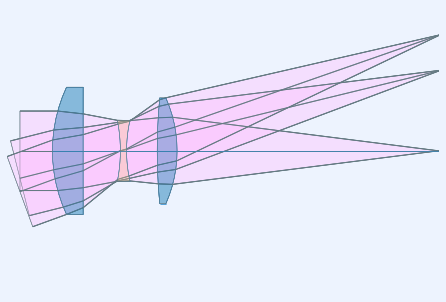

In [11]:
layout_plt = plt.figure(FigureClass=InteractiveLayout, opt_model=opm, is_dark=isdark).plot()

In [12]:
opm.ele_model.list_elements()

0: Object (DummyInterface): Surface(lbl='Obj', profile=Spherical(c=0.0), interact_mode='dummy')
1: Object space (AirGap): Gap(t=10000000000.0, medium=Air())
2: Image (DummyInterface): Surface(lbl='Img', profile=Spherical(c=0.0), interact_mode='dummy')
3: E1 (Element): Element: Spherical(c=0.042170961076202926), Spherical(c=0.00013640168003221264), t=4.8310, sd=10.0087, glass: N-LAK9
4: AG1 (AirGap): Gap(t=5.86, medium=Air())
5: E2 (Element): Element: Spherical(c=-0.04088976120379457), Spherical(c=0.04567044208987943), t=0.9750, sd=4.7919, glass: N-SF5
6: AG2 (AirGap): Gap(t=4.822, medium=Air())
7: E3 (Element): Element: Spherical(c=0.011526181721781025), Spherical(c=-0.04879429301948844), t=3.1270, sd=8.3321, glass: N-LAK9
8: Image space (AirGap): Gap(t=41.2365, medium=Air())


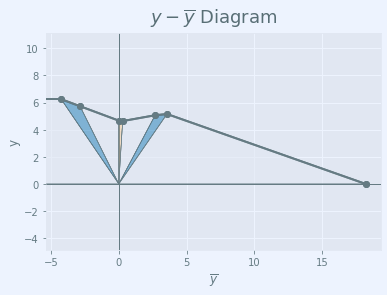

In [13]:
yybar_plt = plt.figure(FigureClass=InteractiveDiagram, opt_model=opm, dgm_type='ht',
                       do_draw_axes=True, do_draw_frame=True, is_dark=isdark).plot()

## Plot the transverse ray aberrations

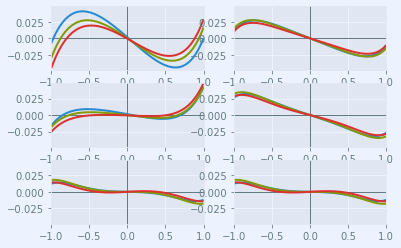

In [14]:
abr_plt = plt.figure(FigureClass=RayFanFigure, opt_model=opm, data_type='Ray', scale_type=Fit.All_Same, is_dark=isdark).plot()

## Plot the wavefront aberration

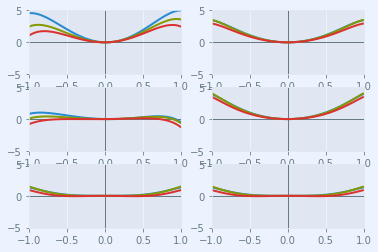

In [15]:
wav_plt = plt.figure(FigureClass=RayFanFigure, opt_model=opm, data_type='OPD', scale_type=Fit.All_Same, is_dark=isdark).plot()

## List the optical specifications

In [16]:
pm.first_order_data()

efl                  50
ffl               -37.1
pp1                12.9
bfl               41.24
ppk               8.763
f/#                   4
m                -5e-09
red              -2e+08
obj_dist          1e+10
obj_ang              20
enp_dist          11.68
enp_radius         6.25
na obj         6.25e-10
n obj                 1
img_dist          41.24
img_ht             18.2
exp_dist         -10.01
exp_radius        6.406
na img           -0.124
n img                 1
optical invariant        2.275


## List the paraxial model

In [17]:
pm.list_lens()

       ax_ray_ht    ax_ray_slp
 0:            0      6.25e-10
 1:         6.25     -0.182126
 2:      5.72969     -0.181586
 3:      4.66559    -0.0532508
 4:      4.63455     0.0891357
 5:      5.06436        0.0488
 6:       5.1546     -0.124998
 7:  0.000143648     -0.124998

       pr_ray_ht    pr_ray_slp
 0:  -3.6397e+09       0.36397
 1:     -4.25088      0.487842
 2:     -2.85718      0.487573
 3:  3.53405e-07      0.487573
 4:       0.2842      0.496304
 5:      2.67738       0.47498
 6:      3.55571      0.355092
 7:      18.1985      0.355092

            power           tau        index    type
 0:             0         1e+10      1.00000    dummy
 1:    0.02914022        2.8569      1.69100    transmit
 2: -9.425384e-05          5.86      1.00000    transmit
 3:   -0.02750683       0.58289      1.67271    transmit
 4:   -0.03072283         4.822      1.00000    transmit
 5:   0.007964615        1.8492      1.69100    transmit
 6:    0.03371696        41.236      1.00000    

## Third Order Seidel aberrations

### Computation and tabular display

In [18]:
to_pkg = compute_third_order(opm)
to_pkg

,S-I,S-II,S-III,S-IV,S-V
1,0.027654,0.019379,0.013581,0.089174,0.072010
2,0.022082,-0.059501,0.160327,-0.000288,-0.431229
3,-0.105156,0.137692,-0.180295,-0.085097,0.347506
4,-0.045358,-0.076796,-0.130024,-0.095046,-0.381069
5,0.007942,0.028382,0.101431,0.024373,0.449596
6,0.103810,-0.050068,0.024148,0.103180,-0.061411
sum,0.010973,-0.000912,-0.010832,0.036297,-0.004597


### Bar chart for surface by surface third order aberrations

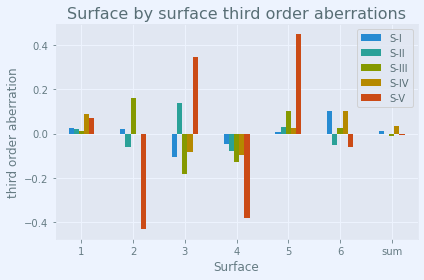

In [19]:
fig, ax = plt.subplots()
ax.set_xlabel('Surface')
ax.set_ylabel('third order aberration')
ax.set_title('Surface by surface third order aberrations')
to_pkg.plot.bar(ax=ax, rot=0)
ax.grid(True)
fig.tight_layout()

### convert aberration sums to transverse measure

In [20]:
ax_ray, pr_ray, fod = osp.parax_data
n_last = pm.sys[-1][mc.indx]
u_last = ax_ray[-1][mc.slp]
to.seidel_to_transverse_aberration(to_pkg.loc['sum',:], n_last, u_last)

TSA   -0.043893
TCO    0.010944
TAS   -0.015198
SAS   -0.101860
PTB   -0.145190
DST    0.018387
dtype: float64

### convert sums to wavefront measure

In [21]:
central_wv = opm.nm_to_sys_units(sm.central_wavelength())
to.seidel_to_wavefront(to_pkg.loc['sum',:], central_wv).T

W040     2.334457
W131    -0.776108
W222    -9.218154
W220    10.834770
W311    -3.911650
dtype: float64

### compute Petzval, sagittal and tangential field curvature

In [22]:
to.seidel_to_field_curv(to_pkg.loc['sum',:], n_last, fod.opt_inv)

TCV    0.000734
SCV    0.004921
PCV    0.007014
dtype: float64

## Save the model

In [23]:
opm.save_model('Sasian Triplet')

## Restore the just saved model to check roundtrip

In [24]:
opm2 = open_model('Sasian Triplet.roa')

In [25]:
print(opm2.specsheet)

infinite conjugates:
imager: IdealImager(m=-0.0, s=-inf, sp=50.00098928993641, tt=inf, f=50.00098928993641)
imager inputs: OrderedDict([('s', -inf)])
frozen imager inputs: [True, True, True, True, False]
etendue inputs:
  field:    OrderedDict([('object', OrderedDict([('angle', 20.0)])), ('image', OrderedDict())])
  aperture: OrderedDict([('object', OrderedDict([('pupil', 12.5)])), ('image', OrderedDict())])
etendue values:
  field:    OrderedDict([('object', OrderedDict([('angle', 20.0)])), ('image', OrderedDict([('height', 18.19887178540003)]))])
  aperture:
    object: OrderedDict([('pupil', 12.5), ('NA', 0), ('f/#', 0)])
    image:  OrderedDict([('f/#', -4.000079143194913), ('NA', 0.12403231826540931), ('pupil', -12.5)])


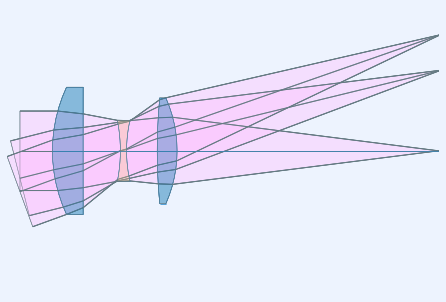

In [26]:
layout_plt2 = plt.figure(FigureClass=InteractiveLayout, opt_model=opm2, is_dark=isdark).plot()

## Plot the transverse ray aberrations

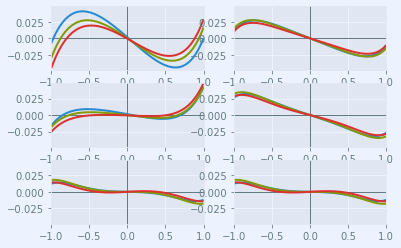

In [27]:
abr_plt2 = plt.figure(FigureClass=RayFanFigure, opt_model=opm2, data_type='Ray', scale_type=Fit.All_Same, is_dark=isdark).plot()

## Miscellaneous

In [28]:
sm.list_surfaces()

0 Surface(lbl='Obj', profile=Spherical(c=0.0), interact_mode='dummy')
1 Surface(profile=Spherical(c=0.042170961076202926), interact_mode='transmit')
2 Surface(profile=Spherical(c=0.00013640168003221264), interact_mode='transmit')
3 Surface(profile=Spherical(c=-0.04088976120379457), interact_mode='transmit')
4 Surface(profile=Spherical(c=0.04567044208987943), interact_mode='transmit')
5 Surface(profile=Spherical(c=0.011526181721781025), interact_mode='transmit')
6 Surface(profile=Spherical(c=-0.04879429301948844), interact_mode='transmit')
7 Surface(lbl='Img', profile=Spherical(c=0.0), interact_mode='dummy')


In [29]:

yybar_plt = plt.figure(FigureClass=InteractiveDiagram, opt_model=opm, dgm_type='ht', refresh_gui=None, is_dark=isdark)
#yybar_plt = plt.figure(FigureClass=InteractiveDiagram, opt_model=opm, dgm_type='ht', refresh_gui=None, is_dark=isdark, grouping='elements')
def refresh_yybar():
    opm.update_model()
    yybar_plt.refresh()

yybar_plt.refresh_gui=refresh_yybar

<InteractiveDiagram size 432x288 with 0 Axes>

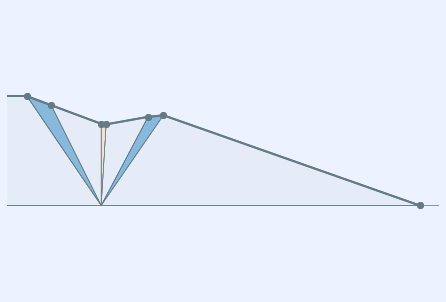

In [30]:
refresh_yybar()
yybar_plt.plot()

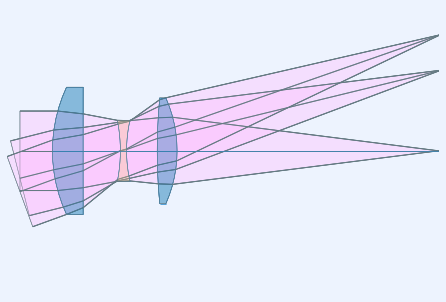

In [31]:
live_layout = plt.figure(FigureClass=InteractiveLayout, opt_model=opm, is_dark=isdark).plot()

In [32]:
bfd=sm.gaps[-1].thi

In [33]:
bfl=osp.parax_data[2].img_dist

In [34]:
bfd,bfl

(41.2365, 41.237649203632785)

In [35]:
osp.parax_data[0][-2]

[5.154604137348769, -0.12499752621433813, -0.3765127908916014]

In [36]:
-osp.parax_data[0][-2][0]/osp.parax_data[0][-2][1]

41.237649203632785

In [37]:
pm.first_order_data()

efl                  50
ffl               -37.1
pp1                12.9
bfl               41.24
ppk               8.763
f/#                   4
m                -5e-09
red              -2e+08
obj_dist          1e+10
obj_ang              20
enp_dist          11.68
enp_radius         6.25
na obj         6.25e-10
n obj                 1
img_dist          41.24
img_ht             18.2
exp_dist         -10.01
exp_radius        6.406
na img           -0.124
n img                 1
optical invariant        2.275
